In [1]:
import torch

In [2]:
# device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
mps_device = torch.device("mps")

In [3]:
import numpy as np
from tensorflow.keras.datasets import cifar100

CLASS_NAMES = sorted(['beaver', 'dolphin', 'otter', 'seal', 'whale',  # aquatic mammals
                           'aquarium' 'fish', 'flatfish', 'ray', 'shark', 'trout',  # fish
                           'orchids', 'poppies', 'roses', 'sunflowers', 'tulips', # flowers
                           'bottles', 'bowls', 'cans', 'cups', 'plates', # food containers
                           'apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers', # fruit and vegetables
                           'clock', 'keyboard', 'lamp', 'telephone', 'television', # household electrical devices
                           'bed', 'chair', 'couch', 'table', 'wardrobe', # household furniture
                           'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach', # insects
                           'bear', 'leopard', 'lion', 'tiger', 'wolf', # large carnivores
                           'bridge', 'castle', 'house', 'road', 'skyscraper', # large man-made outdoor things
                           'cloud', 'forest', 'mountain', 'plain', 'sea', # large natural outdoor scenes
                           'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo', # large omnivores and herbivores
                           'fox', 'porcupine', 'possum', 'raccoon', 'skunk', # medium-sized mammals
                           'crab', 'lobster', 'snail', 'spider', 'worm', # non-insect invertebrates
                           'baby', 'boy', 'girl', 'man', 'woman', # people
                           'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle', # reptiles
                           'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel', # small mammals
                           'maple', 'oak', 'palm', 'pine', 'willow', # trees
                           'bicycle', 'bus', 'motorcycle', 'pickup truck', 'train', # vehicles 1
                           'lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor' # vehicles 2
                          ])

(train_images, train_targets), (test_images, test_targets) = cifar100.load_data()

print(np.unique(test_targets))
print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


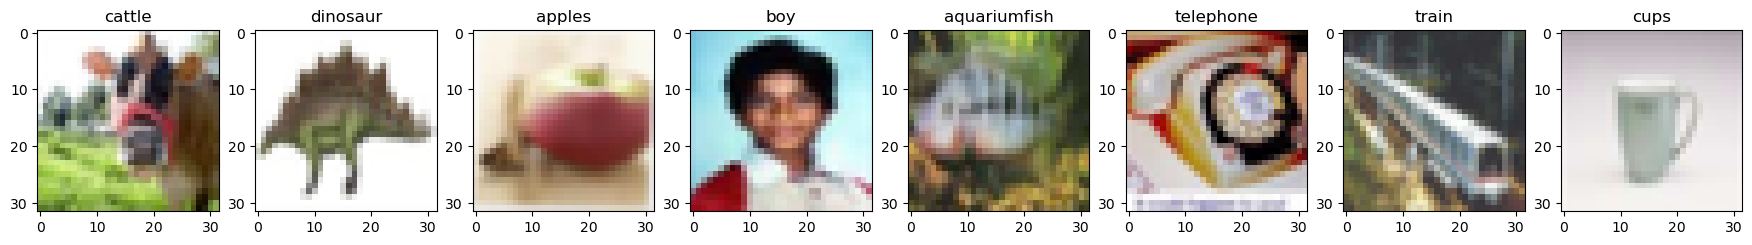

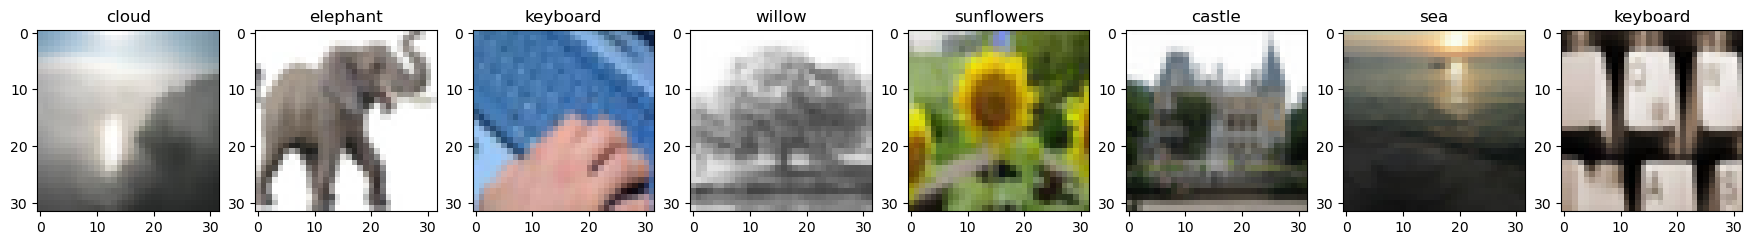

In [4]:
import matplotlib.pyplot as plt

def show_images(images, targets, ncols=8):
    fig, axes = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i in range(ncols):
        axes[i].imshow(images[i])
        target = targets[i].squeeze()
        axes[i].set_title(CLASS_NAMES[int(target)])

show_images(train_images[:8], train_targets[:8])
show_images(train_images[8:16], train_targets[8:16])

In [5]:
import numpy as np

def get_preprocessed_data(images, targets):
    images = np.array(images / 255.0, dtype=np.float32)
    targets = np.array(targets, dtype=np.float32)

    return images, targets

train_images, train_targets = get_preprocessed_data(train_images, train_targets)
test_images, test_targets = get_preprocessed_data(test_images, test_targets)


print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [6]:
train_targets = train_targets.squeeze()
test_targets = test_targets.squeeze()

print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(50000, 32, 32, 3) (50000,)
(10000, 32, 32, 3) (10000,)


In [7]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D, Activation, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.regularizers import l1, l2

INPUT_SIZE = 32

input_tensor = Input(shape=(INPUT_SIZE,INPUT_SIZE,3))

# x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_regularizer=l2(1e-5), kernel_initializer='he_normal')(input_tensor)
x = Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

# x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_regularizer=l2(1e-5), kernel_initializer='he_normal')(x)
x = Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=256, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=256, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=512, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=512, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = GlobalAveragePooling2D()(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu', kernel_initializer='he_normal')(x)
x = Dropout(rate=0.5)(x)
output = Dense(100, activation='softmax', kernel_initializer='glorot_normal')(x)

model = Model(inputs= input_tensor, outputs = output)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 512)      │             

 Total params: 4,767,552 (18.19 MB)

 Trainable params: 4,763,968 (18.17 MB)

 Non-trainable params: 3,584 (14.00 KB)

In [8]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])

In [9]:
mcp_cb = ModelCheckpoint(
    filepath='./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='auto'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode='min'
)

In [10]:
history = model.fit(x=train_images,
                    y=train_targets, 
                    batch_size=32,
                    epochs=3,
                    validation_split=0.2,
                    callbacks = [mcp_cb, rlr_cb, ely_cb]
                   )

Epoch 1/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1001s 800ms/step - acc: 0.0281 - loss: 4.5676 - val_acc: 0.0738 - val_loss: 4.0693 - learning_rate: 0.0010
Epoch 2/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1124s 899ms/step - acc: 0.0733 - loss: 3.9791 - val_acc: 0.1013 - val_loss: 3.7827 - learning_rate: 0.0010
Epoch 3/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1152s 921ms/step - acc: 0.1136 - loss: 3.6563 - val_acc: 0.1549 - val_loss: 3.3504 - learning_rate: 0.0010


In [11]:
# 테스트 데이터 세트로 모델 성능 검증
model.evaluate(test_images, test_targets, batch_size=32, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 68s 216ms/step - acc: 0.1594 - loss: 3.3584


[3.3444664478302, 0.1589999943971634]

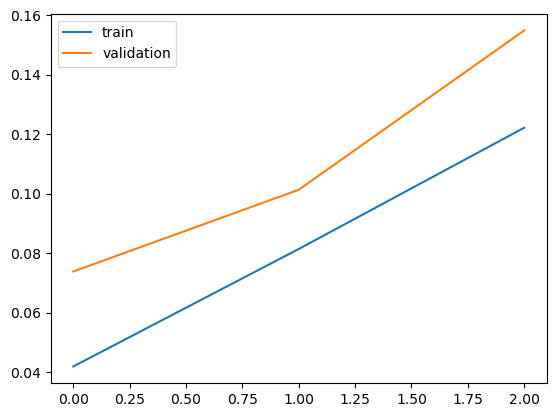

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')

plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
[71 53 76 66 89 71 11 42]


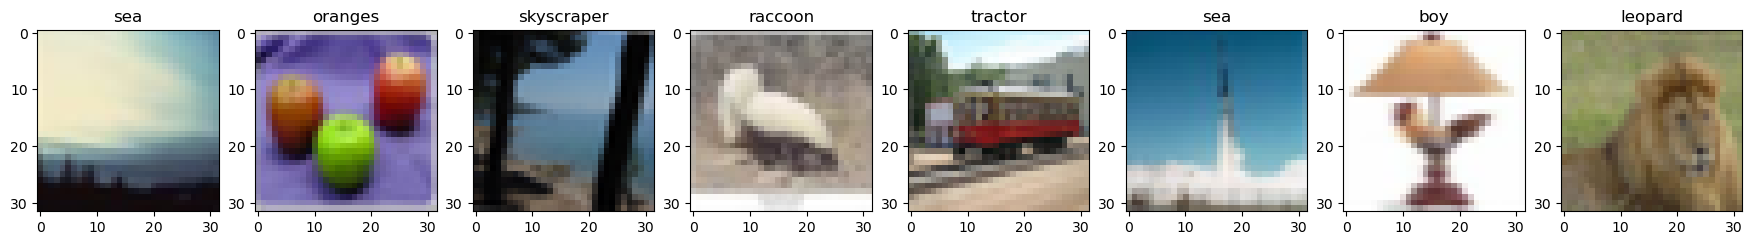

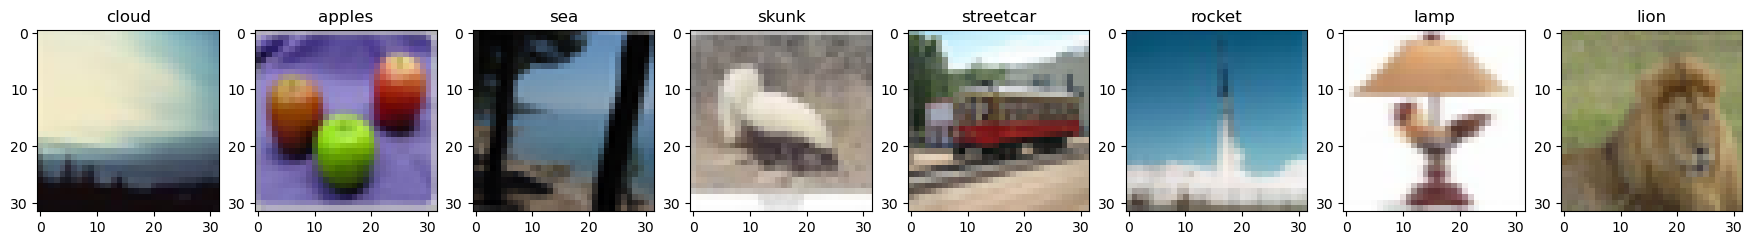

In [13]:
pred_probas = model.predict(test_images[8:16], batch_size=128)
pred_classes = np.argmax(pred_probas.squeeze(), axis=1)
print(pred_classes)

show_images(test_images[8:16], pred_classes)
show_images(test_images[8:16], test_targets[8:16])

# 위에서 가져온 weight 를 기준으로 추가 훈련 진행

In [14]:
model.load_weights('./callback_files/')

model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

ValueError: File format not supported: filepath=./callback_files/. Keras 3 only supports V3 `.keras` and `.weights.h5` files, or legacy V1/V2 `.h5` files.

In [ ]:
history = model.fit(x=train_images,
                    y=train_targets, 
                    batch_size=32,
                    epochs=3,
                    validation_split=0.2,
                    callbacks = [mcp_cb, rlr_cb, ely_cb]
                   )

In [ ]:
model.evaluate(test_images, test_targets)